In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import Imputer,LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_auc_score,roc_curve

In [2]:
s=pd.read_csv('C:/Users/hp/Downloads/sonar.csv',names=range(0,61))

In [3]:
son=pd.DataFrame(s)
son.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [4]:
son.isnull().sum()

0     0
1     0
2     0
3     0
4     0
     ..
56    0
57    0
58    0
59    0
60    0
Length: 61, dtype: int64

In [5]:
le=LabelEncoder()
son[60]=le.fit_transform(son[60].astype(str))

In [6]:
son.skew()

0     2.131088
1     2.155644
2     2.652518
3     3.401697
4     2.018141
        ...   
56    1.653090
57    2.098330
58    1.737506
59    2.775754
60    0.135903
Length: 61, dtype: float64

In [7]:
for col in son.columns:
    if son[col].skew()>0.55:
        son[col]=np.log1p(son[col])

In [8]:
son.skew()

0     2.036001
1     1.969917
2     2.344713
3     2.818320
4     1.698684
        ...   
56    1.629182
57    2.058207
58    1.713349
59    2.711412
60    0.135903
Length: 61, dtype: float64

In [9]:
x=son.iloc[:,:-1]
y=son.iloc[:,-1]

In [10]:
from sklearn.decomposition import PCA
pca=PCA(n_components=15)
x=pca.fit_transform(x)

In [11]:
import warnings
warnings.filterwarnings('ignore')
def random(alg):
    r_state=0
    for r_score in range(43,101):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=r_score)
        alg.fit(x_train,y_train)
        pred=alg.predict(x_test)
        accuracy=accuracy_score(y_test,pred)
        if accuracy > r_state:
            r_state=accuracy
            final_r=r_score
    print(r_state,'at',final_r)

In [12]:
def model(a):
    ml=a
    ml.fit(x_train,y_train)
    pred=ml.predict(x_test)
    score=ml.score(x_train,y_train)
    print(accuracy_score(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))

In [13]:
def roc(alg):
    y_pred_prob=alg.predict_proba(x_test)[:,1]
    fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr,tpr)
    plt.xlabel('false_Positive_rate')
    plt.ylabel('True positive rate')
    plt.title(alg)
    plt.show()
    roc_score=roc_auc_score(y_test,alg.predict(x_test))
    print('roc_auc_score=',roc_score)

In [14]:
def cross_val(alg):
    cvscore=cross_val_score(alg,x,y,cv=5)
    print(cvscore)
    print(cvscore.mean())
    print(cvscore.std())

In [15]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
random(lr)

0.8695652173913043 at 67


In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=47)
model(lr)

0.8115942028985508
[[28  7]
 [ 6 28]]
              precision    recall  f1-score   support

           0       0.82      0.80      0.81        35
           1       0.80      0.82      0.81        34

    accuracy                           0.81        69
   macro avg       0.81      0.81      0.81        69
weighted avg       0.81      0.81      0.81        69



In [17]:
cross_val(lr)

[0.41860465 0.76190476 0.65853659 0.85365854 0.46341463]
0.6312238338330227
0.1677304579886136


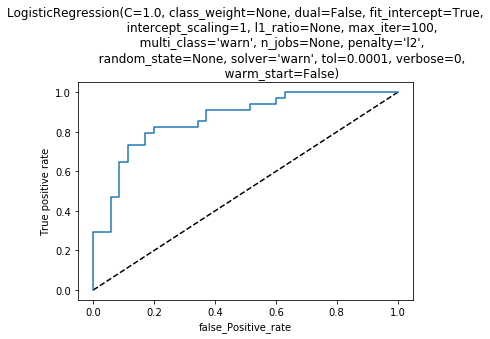

roc_auc_score= 0.811764705882353


In [18]:
roc(lr)

In [20]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
random(dtc)

0.8115942028985508 at 45


In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=45)
model(dtc)

0.7536231884057971
[[25  9]
 [ 8 27]]
              precision    recall  f1-score   support

           0       0.76      0.74      0.75        34
           1       0.75      0.77      0.76        35

    accuracy                           0.75        69
   macro avg       0.75      0.75      0.75        69
weighted avg       0.75      0.75      0.75        69



In [22]:
cross_val(dtc)

[0.3255814  0.66666667 0.48780488 0.3902439  0.56097561]
0.48625449045188124
0.12096948309296579


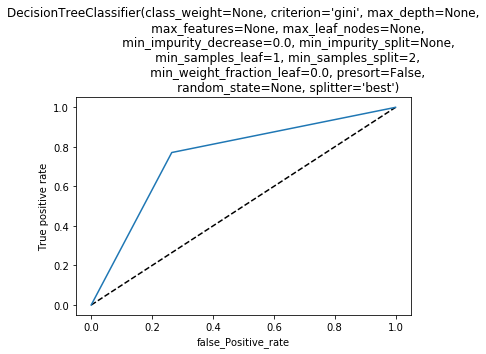

roc_auc_score= 0.7533613445378151


In [23]:
roc(dtc)

In [24]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
random(gnb)

0.8405797101449275 at 63


In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=63)
model(gnb)

0.8405797101449275
[[36  9]
 [ 2 22]]
              precision    recall  f1-score   support

           0       0.95      0.80      0.87        45
           1       0.71      0.92      0.80        24

    accuracy                           0.84        69
   macro avg       0.83      0.86      0.83        69
weighted avg       0.86      0.84      0.84        69



In [26]:
cross_val(gnb)

[0.46511628 0.71428571 0.3902439  0.68292683 0.51219512]
0.5529535694028037
0.12551668063469495


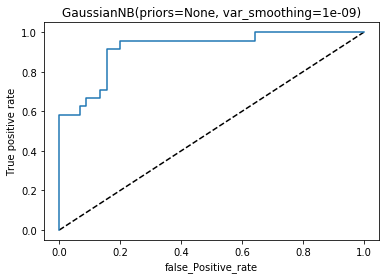

roc_auc_score= 0.8583333333333333


In [27]:
roc(gnb)

In [28]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
random(knn)

0.855072463768116 at 51


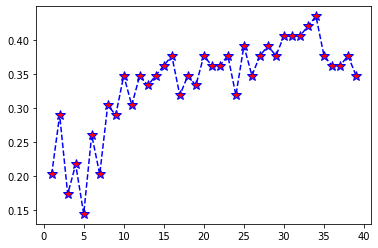

In [31]:
error=[]
for i in range(1,40):
    kn=KNeighborsClassifier(n_neighbors=i)
    kn.fit(x_train,y_train)
    pred=kn.predict(x_test)
    error.append(np.mean(pred!=y_test))
plt.plot(range(1,40),error,marker='*',markersize=10,markerfacecolor='red',color='blue',linestyle='dashed')

In [32]:
kn=KNeighborsClassifier(n_neighbors=5)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=51)
model(kn)

0.855072463768116
[[29  3]
 [ 7 30]]
              precision    recall  f1-score   support

           0       0.81      0.91      0.85        32
           1       0.91      0.81      0.86        37

    accuracy                           0.86        69
   macro avg       0.86      0.86      0.86        69
weighted avg       0.86      0.86      0.86        69



In [33]:
cross_val(kn)

[0.60465116 0.5952381  0.56097561 0.6097561  0.34146341]
0.5424168759960024
0.10190630858600583


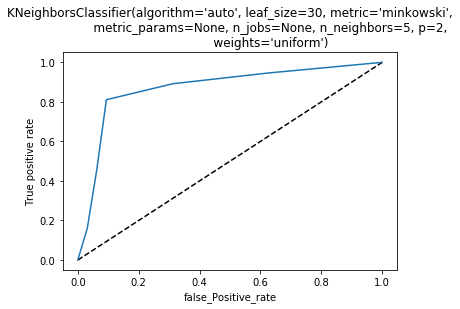

roc_auc_score= 0.8585304054054055


In [34]:
roc(kn)

In [35]:
from sklearn.svm import SVC
svm=SVC()
random(svm)

0.8115942028985508 at 92


In [36]:
parameters = {'kernel':["rbf","linear"],'C':[1,10,100]}
grids=GridSearchCV(svm,parameters)
grids.fit(x_train,y_train)
print(grids.best_score_)
print(grids.best_params_)

0.8201438848920863
{'C': 10, 'kernel': 'linear'}


In [38]:
svm=SVC(kernel='linear',probability=True)
model(svm)

0.782608695652174
[[29  3]
 [12 25]]
              precision    recall  f1-score   support

           0       0.71      0.91      0.79        32
           1       0.89      0.68      0.77        37

    accuracy                           0.78        69
   macro avg       0.80      0.79      0.78        69
weighted avg       0.81      0.78      0.78        69



In [39]:
cross_val(svm)

[0.34883721 0.71428571 0.65853659 0.92682927 0.46341463]
0.6223806822785836
0.20126547733228736


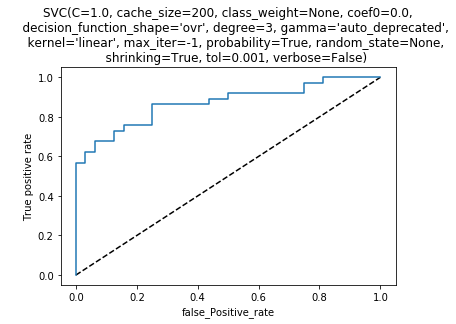

roc_auc_score= 0.7909628378378378


In [40]:
roc(svm)

In [41]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
parameters={'n_estimators':[10,100,500,1000]}
gr=GridSearchCV(rf,parameters)
gr.fit(x_train,y_train)
print(gr.best_score_)
print(gr.best_params_)

0.8129496402877698
{'n_estimators': 100}


In [42]:
random(rf)

0.855072463768116 at 53


In [43]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=90)
rf=RandomForestClassifier(n_estimators=100)
model(rf)

0.782608695652174
[[31  4]
 [11 23]]
              precision    recall  f1-score   support

           0       0.74      0.89      0.81        35
           1       0.85      0.68      0.75        34

    accuracy                           0.78        69
   macro avg       0.79      0.78      0.78        69
weighted avg       0.79      0.78      0.78        69



In [44]:
cross_val(rf)

[0.51162791 0.69047619 0.41463415 0.68292683 0.58536585]
0.5770061853442454
0.10469336871117756


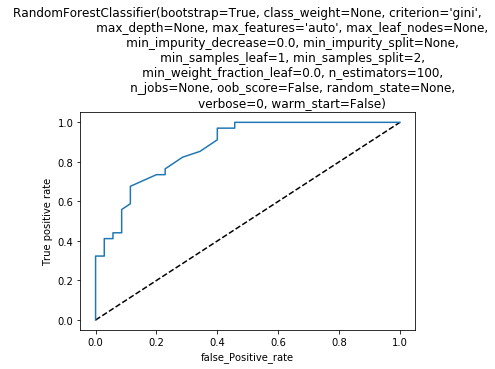

roc_auc_score= 0.7810924369747899


In [45]:
roc(rf)

In [46]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
parameters={'learning_rate':[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000]}
grid=GridSearchCV(gbc, parameters)
grid.fit(x,y)
grid.best_params_

{'learning_rate': 0.1, 'n_estimators': 100}

In [47]:
random(gbc)

0.8840579710144928 at 45


In [48]:
gbc=GradientBoostingClassifier(learning_rate=0.1,n_estimators=100)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=45)
model(gbc)

0.8840579710144928
[[33  1]
 [ 7 28]]
              precision    recall  f1-score   support

           0       0.82      0.97      0.89        34
           1       0.97      0.80      0.88        35

    accuracy                           0.88        69
   macro avg       0.90      0.89      0.88        69
weighted avg       0.90      0.88      0.88        69



In [49]:
cross_val(gbc)

[0.39534884 0.76190476 0.53658537 0.63414634 0.70731707]
0.6070604759203737
0.130038718396556


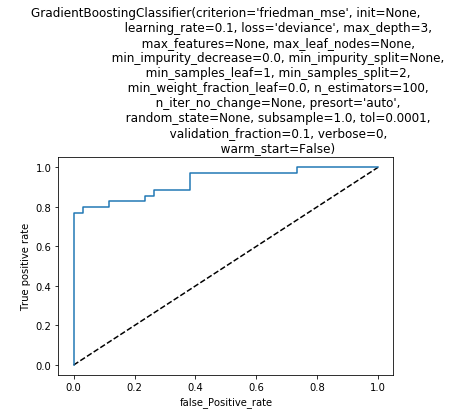

roc_auc_score= 0.8852941176470588


In [50]:
roc(gbc)

Gradient Boosting Classifier is the best algorithm over all others 

In [52]:
from sklearn.externals import joblib
joblib.dump(gbc,'Sonar2.pkl')

['Sonar2.pkl']